In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# for inline plotting in jupyter
%matplotlib inline

In [3]:
# data import
df = pd.read_csv("january_incidents.csv")

In [4]:
df.head(3)

,incident_id,time_to_first_symptom,time_to_create,time_to_detect,time_to_mitigate,time_to_close,department,issue_type,time_to_create_minutes,time_to_detect_minutes,time_to_closure_minutes,week_number,day_in_week,quarter_of_year,month_of_year,impacted_clients
0,2025011000,2025-01-01 13:27,2025-01-01 13:56,2025-01-01 14:12,2025-01-01 14:53,2025-01-01 15:34,5,3,29,45,127,1,3,1,1,4;8;9;10
1,2025011001,2025-01-01 13:44,2025-01-01 13:58,2025-01-01 14:27,2025-01-01 14:44,2025-01-01 16:06,10,4,14,43,142,1,3,1,1,4;8
2,2025011002,2025-01-01 11:42,2025-01-01 12:03,2025-01-01 12:44,2025-01-01 13:33,2025-01-01 14:12,10,5,21,62,150,1,3,1,1,2;4;5;9


In [5]:
# -----------------------------------------
# 2.1 Group by week_number
# -----------------------------------------
weekly_incidents = df.groupby('week_number')['incident_id'].count()

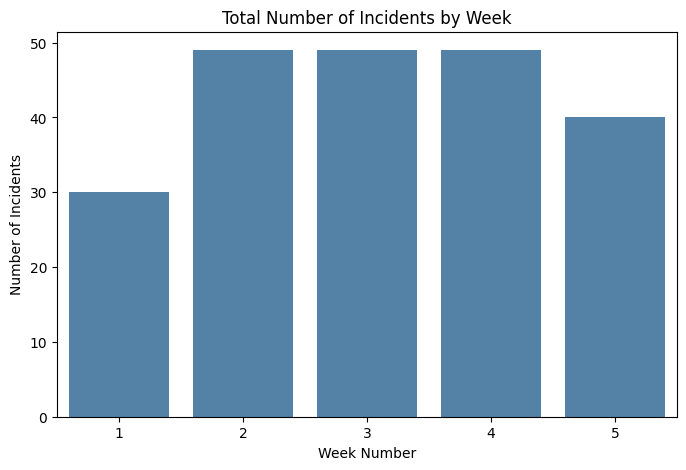

In [6]:
# -----------------------------------------
# 2.2 Plot number of incidents per week
# -----------------------------------------
plt.figure(figsize=(8, 5))
sns.barplot(x=weekly_incidents.index, y=weekly_incidents.values, color="steelblue")
plt.title("Total Number of Incidents by Week")
plt.xlabel("Week Number")
plt.ylabel("Number of Incidents")

# If the x-axis has too many weeks, rotate tick labels:
# plt.xticks(rotation=45)

plt.show()

In [7]:
print("Number of incidents per week:")
display(weekly_incidents)

Number of incidents per week:


week_number
1    30
2    49
3    49
4    49
5    40
Name: incident_id, dtype: int64

In [8]:
# -----------------------------------------
# 3.1 Incidents by department and week
# -----------------------------------------
dept_week_counts = df.groupby(['department', 'week_number'])['incident_id'].count().reset_index()

# Make a pivot table so each row is a week, each column is a department
pivot_dept_week = dept_week_counts.pivot(
    index='week_number', 
    columns='department', 
    values='incident_id'
).fillna(0)

<Figure size 1000x600 with 0 Axes>

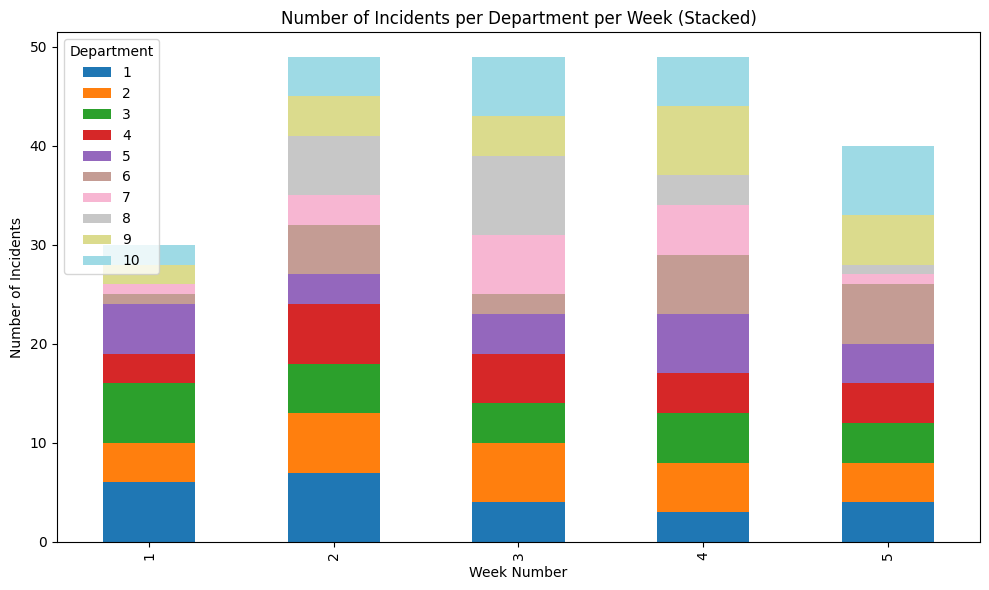

In [9]:
# -----------------------------------------
# 3.2 Plot a stacked bar chart
# -----------------------------------------
plt.figure(figsize=(10, 6))
pivot_dept_week.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6),
    colormap="tab20"
)
plt.title("Number of Incidents per Department per Week (Stacked)")
plt.xlabel("Week Number")
plt.ylabel("Number of Incidents")
plt.legend(title="Department")
plt.tight_layout()
plt.show()

In [10]:
print("Pivot table of incidents per department per week:")
display(pivot_dept_week)

Pivot table of incidents per department per week:


department,1,2,3,4,5,6,7,8,9,10
week_number,,,,,,,,,,
1,6.0,4.0,6.0,3.0,5.0,1.0,1.0,0.0,2.0,2.0
2,7.0,6.0,5.0,6.0,3.0,5.0,3.0,6.0,4.0,4.0
3,4.0,6.0,4.0,5.0,4.0,2.0,6.0,8.0,4.0,6.0
4,3.0,5.0,5.0,4.0,6.0,6.0,5.0,3.0,7.0,5.0
5,4.0,4.0,4.0,4.0,4.0,6.0,1.0,1.0,5.0,7.0


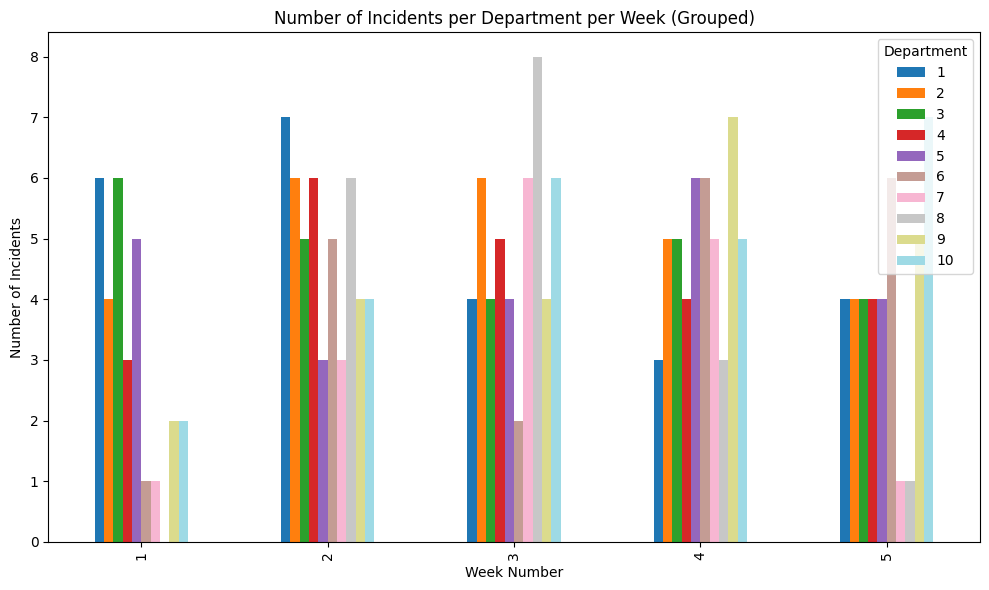

In [11]:
# Grouped bar chart

pivot_dept_week.plot(
    kind='bar', 
    figsize=(10, 6), 
    colormap="tab20"
)
plt.title("Number of Incidents per Department per Week (Grouped)")
plt.xlabel("Week Number")
plt.ylabel("Number of Incidents")
plt.legend(title="Department")
plt.tight_layout()
plt.show()

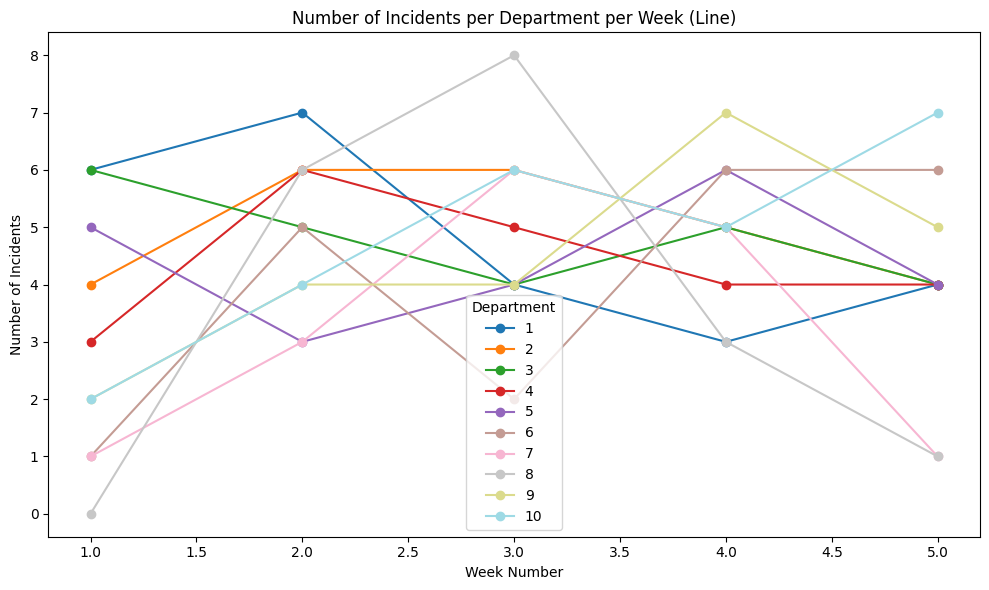

In [12]:
# Line chart

pivot_dept_week.plot(
    kind='line', 
    marker='o', 
    figsize=(10, 6), 
    colormap="tab20"
)
plt.title("Number of Incidents per Department per Week (Line)")
plt.xlabel("Week Number")
plt.ylabel("Number of Incidents")
plt.legend(title="Department")
plt.tight_layout()
plt.show()